# Evaluating Different Activation Functions in a CNN on Image Data
This code evaluates the performance of 10 different activation functions in a Convolutional Neural Network (CNN) using an image dataset. It uses ImageDataGenerator to load and preprocess images with a training-validation split. The CNN is built and compiled with each activation function, trained for a specified number of epochs, and evaluated on the validation set. The accuracy for each activation function is recorded and plotted using a bar chart for comparison. This helps determine the most effective activation function for the given image classification task.


## Loading All libraries which are required

In [13]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from  tensorflow.keras.models  import Sequential 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


### LOading the dataset

In [5]:
data_dir = "D:\ML A-Z\Deep Learning\Activation Functions\Image Classification"


## Initialization of ImageDataGenerator with Normalization and Validation Split
### rescale=1.0/255:

This parameter scales the pixel values of the images from the range [0, 255] to [0, 1]. Pixel values in images are typically between 0 and 255. Dividing by 255 normalizes these values, which can help the neural network train more effectively and efficiently by having input values in a consistent range.
### validation_split=0.2:

This parameter reserves 20% of the data for validation purposes. The remaining 80% will be used for training. This split is useful for assessing the model's performance on a separate subset of data that it hasn't seen during training, helping to evaluate how well the model generalizes to new data.

In [6]:

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

## Creating a Training Data Generator from Directory with Preprocessing and Batch Settings
#### datagen.flow_from_directory():

This method generates batches of images and their corresponding labels from a directory structure.
### data_dir:

Specifies the path to the directory containing the image data organized into subdirectories by class.
#### target_size=(64, 64):

Resizes all images to 64x64 pixels. This ensures that all images have the same dimensions before feeding them into the model.
#### batch_size=32:

Determines the number of images to be included in each batch. Training the model in batches helps manage memory usage and speeds up the training process.
#### class_mode='categorical':

Indicates that the labels are categorical (e.g., one-hot encoded). This is used for multi-class classification problems.
##### subset='training':

Specifies that this generator is for the training subset of the data, as defined by the validation_split parameter used when initializing the ImageDataGenerator.

In [7]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 774 images belonging to 3 classes.


## Creating a Validation Data Generator from Directory with Preprocessing and Batch Settings
This line of code sets up a data generator for validation by reading and preprocessing images from a specified directory:

### datagen.flow_from_directory():

This method generates batches of images and labels from a directory structure.
#### data_dir:

Path to the directory containing the image dataset organized into subdirectories by class.
#### target_size=(64, 64):

Resizes all images to 64x64 pixels to ensure uniform input size for the model.
##### batch_size=32:

Specifies the number of images to be included in each batch for validation.
#### class_mode='categorical':

Indicates that labels are categorical (one-hot encoded), suitable for multi-class classification.
#### subset='validation':

Indicates that this generator is for the validation subset of the data, as defined by the validation_split parameter in the ImageDataGenerator.

In [8]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 191 images belonging to 3 classes.


## Function to Create a Convolutional Neural Network Model with Specified Activation Function
This function, create_model(activation), defines and compiles a Convolutional Neural Network (CNN) with the specified activation function. Here’s how it works:

### Model Initialization:

model = Sequential(): Initializes a Sequential model, which is a linear stack of layers.
### Convolutional Layers:

#### model.add(Conv2D(32, (3, 3), activation=activation, input_shape=(64, 64, 3))): 
Adds a 2D convolutional layer with 32 filters of size 3x3, using the specified activation function. The input_shape parameter defines the shape of the input images (64x64 pixels with 3 color channels).
#### model.add(MaxPooling2D(pool_size=(2, 2))): 
Adds a max pooling layer to reduce the spatial dimensions by taking the maximum value in a 2x2 pool.
#### Additional Convolutional Layers:

#### model.add(Conv2D(32, (3, 3), activation=activation)): 
Adds another convolutional layer with 32 filters of size 3x3 and the specified activation function.
#### model.add(MaxPooling2D(pool_size=(2, 2))): 
Adds another max pooling layer.
### Flatten and Dense Layers:

### model.add(Flatten()):
Flattens the 3D output from the convolutional layers into a 1D vector.
#### model.add(Dense(64, activation=activation)):
Adds a fully connected (dense) layer with 64 units and the specified activation function.
#### Output Layer:

##### model.add(Dense(train_generator.num_classes, activation='softmax')): 
Adds a dense layer with a number of units equal to the number of classes in the dataset, using the 'softmax' activation function to output class probabilities.
#### Compilation:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']): Compiles the model with the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric.
#### Return:

return model: Returns the compiled model.

In [9]:
def create_model(activation):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation, input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation=activation))
    model.add(Dense(train_generator.num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## List of Activation Functions for Experimentation
This line of code defines a list of activation functions to be used in a neural network. Each activation function serves a different purpose in introducing non-linearity into the model:

#### 'relu':
Rectified Linear Unit - Outputs the input directly if it is positive; otherwise, it outputs zero. Commonly used due to its simplicity and effectiveness.
#### 'sigmoid': 
Sigmoid - Maps input to a value between 0 and 1, useful for binary classification tasks.
#### 'tanh': 
Hyperbolic Tangent - Maps input to a value between -1 and 1, often used in hidden layers to introduce non-linearity.
#### 'elu': 
Exponential Linear Unit - Similar to ReLU but allows for negative outputs, which can help with training deep networks.
#### 'selu':
Scaled Exponential Linear Unit - An activation function that self-normalizes activations and can improve learning speed and performance.
#### 'softplus':
Softplus - Smooth approximation to ReLU that outputs values between 0 and positive infinity.
##### 'softsign':
Softsign - Maps input to a value between -1 and 1, smoother than tanh.
### 'exponential':
Exponential - Outputs the exponential of the input, which can result in very large outputs.
#### 'swish':
Swish - A smooth, non-monotonic activation function that has been shown to improve performance in some cases.
#### 'hard_sigmoid':
Hard Sigmoid - A computationally efficient approximation of the sigmoid function, faster but less accurate.

In [15]:
activation_functions = ['relu', 'sigmoid', 'tanh', 'elu', 'selu', 'softplus', 'softsign', 'exponential', 'swish', 'hard_sigmoid']


## Training and Evaluating Models with Different Activation Functions
This code snippet trains and evaluates a neural network model using different activation functions. #### Here's a breakdown of the process:

#### results = {}:

Initializes an empty dictionary to store the accuracy results for each activation function.
#### Loop through Activation Functions:

The for activation in activation_functions: loop iterates through each activation function specified in the activation_functions list.
#### Model Training:

#### model = create_model(activation): 
Creates a new model using the current activation function.
##### model.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=0): 
Trains the model on the training data for 5 epochs, using the validation data to monitor performance. The verbose=0 argument suppresses detailed training output.
#### Model Evaluation:

loss, accuracy = model.evaluate(validation_generator, verbose=0): Evaluates the model on the validation data and retrieves the loss and accuracy metrics. verbose=0 suppresses detailed output.
#### Storing Results:

#### results[activation] = accuracy:
Stores the accuracy for the current activation function in the results dictionary.
##### print(f"Accuracy with {activation}: {accuracy:.4f}"):
Prints the accuracy of the model with the current activation function to the console.

In [18]:

results = {}

# Loop through the activation functions
for activation in activation_functions:
    print(f"Training with activation function: {activation}")
    model = create_model(activation)
    model.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=0)  # Adjust epochs as needed
    
    # Evaluate the model
    loss, accuracy = model.evaluate(validation_generator, verbose=0)
    results[activation] = accuracy
    print(f"Accuracy with {activation}: {accuracy:.4f}")


Training with activation function: relu
Accuracy with relu: 0.9634
Training with activation function: sigmoid
Accuracy with sigmoid: 0.7382
Training with activation function: tanh
Accuracy with tanh: 0.8848
Training with activation function: elu
Accuracy with elu: 0.9529
Training with activation function: selu
Accuracy with selu: 0.8901
Training with activation function: softplus
Accuracy with softplus: 0.7382
Training with activation function: softsign
Accuracy with softsign: 0.9634
Training with activation function: exponential
Accuracy with exponential: 0.6492
Training with activation function: swish
Accuracy with swish: 0.9424
Training with activation function: hard_sigmoid
Accuracy with hard_sigmoid: 0.3717


## Displaying Final Accuracy Results for Different Activation Functions
This code snippet prints out the final accuracy results for each activation function evaluated:

## print("\nFinal Results:"):

Prints a header to indicate the beginning of the final results section.
### Loop through Results:

#### for activation, accuracy in results.items():
### Print Results:

### print(f"{activation}: {accuracy:.4f}"):
Prints the activation function name and its accuracy, formatted to four decimal places.

In [19]:

print("\nFinal Results:")
for activation, accuracy in results.items():
    print(f"{activation}: {accuracy:.4f}")


Final Results:
relu: 0.9634
sigmoid: 0.7382
tanh: 0.8848
elu: 0.9529
selu: 0.8901
softplus: 0.7382
softsign: 0.9634
exponential: 0.6492
swish: 0.9424
hard_sigmoid: 0.3717


### plt.figure(figsize=(10, 6)):

Creates a new figure with a specified size of 10x6 inches for the plot.
### plt.bar(results.keys(), results.values(), color='skyblue'):

Creates a bar chart where the x-axis represents the activation functions (keys from the results dictionary) and the y-axis represents their corresponding accuracies (values from the results dictionary). The bars are colored sky blue.
#### plt.xlabel('Activation Functions'):

Sets the label for the x-axis to "Activation Functions".
#### plt.ylabel('Accuracy'):

Sets the label for the y-axis to "Accuracy".
#### plt.title('Accuracy of Different Activation Functions'):

Sets the title of the plot to "Accuracy of Different Activation Functions".
#### plt.ylim(0, 1):

Sets the y-axis limits from 0 to 1, assuming accuracy values fall within this range.
### plt.xticks(rotation=45):

Rotates the x-axis labels by 45 degrees to improve readability, especially if there are many activation functions.
#### plt.show():

Displays the plot.

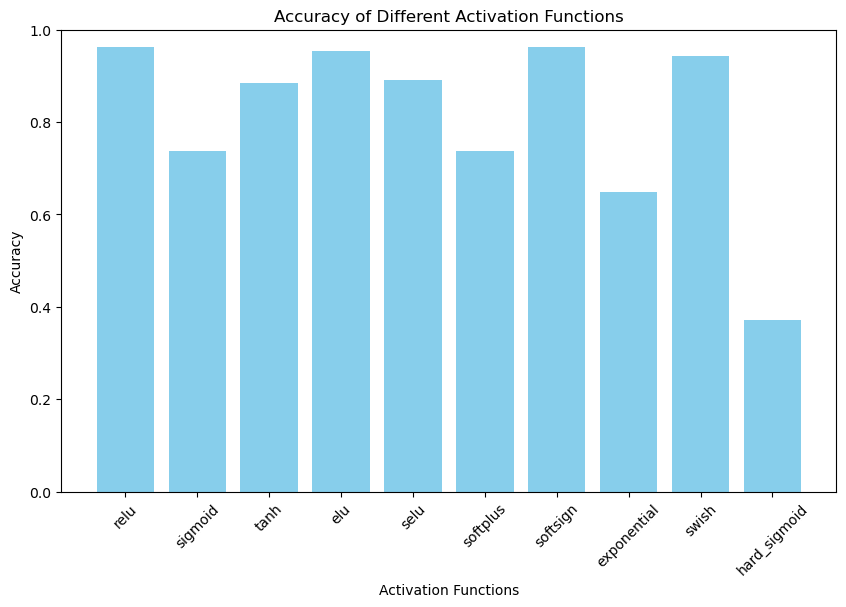

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Activation Functions')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Activation Functions')
plt.ylim(0, 1)  # Assuming accuracy values are between 0 and 1
plt.xticks(rotation=45)
plt.show()